# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[128,64,32]):
#Build your own model
    input_layer = keras.layers.Input(input_shape)
    for i, unit in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=unit, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=unit, activation="relu", name="hidden_layer"+str(i+1))(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model    

In [6]:
#超參數設定
#Set your required experiment parameters
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 35
MOMENTUM = 0.95
BATCH_SIZE = 256

# Adam

In [7]:
results = {}
#建立你的訓練與實驗迴圈並蒐集資料
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" %(lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name = "exp-lr-%s" %str(lr)
    results[exp_name] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/35
50000/50000 [===============

50000/50000 [==============================] - 7s 131us/step - loss: 1.6639 - accuracy: 0.3969 - val_loss: 1.6611 - val_accuracy: 0.3893
Epoch 7/35
50000/50000 [==============================] - 6s 123us/step - loss: 1.6489 - accuracy: 0.4018 - val_loss: 1.6349 - val_accuracy: 0.4083
Epoch 8/35
50000/50000 [==============================] - 7s 130us/step - loss: 1.6162 - accuracy: 0.4175 - val_loss: 1.6168 - val_accuracy: 0.4161
Epoch 9/35
50000/50000 [==============================] - 7s 138us/step - loss: 1.6036 - accuracy: 0.4201 - val_loss: 1.5887 - val_accuracy: 0.4267
Epoch 10/35
50000/50000 [==============================] - 7s 137us/step - loss: 1.5906 - accuracy: 0.4261 - val_loss: 1.6019 - val_accuracy: 0.4179
Epoch 11/35
50000/50000 [==============================] - 7s 134us/step - loss: 1.5817 - accuracy: 0.4263 - val_loss: 1.6438 - val_accuracy: 0.4042
Epoch 12/35
50000/50000 [==============================] - 6s 128us/step - loss: 1.5578 - accuracy: 0.4365 - val_loss: 1.

Epoch 19/35
50000/50000 [==============================] - 6s 124us/step - loss: 1.3669 - accuracy: 0.5124 - val_loss: 1.4656 - val_accuracy: 0.4770
Epoch 20/35
50000/50000 [==============================] - 7s 132us/step - loss: 1.3578 - accuracy: 0.5140 - val_loss: 1.4486 - val_accuracy: 0.4843
Epoch 21/35
50000/50000 [==============================] - 6s 125us/step - loss: 1.3532 - accuracy: 0.5182 - val_loss: 1.4797 - val_accuracy: 0.4720
Epoch 22/35
50000/50000 [==============================] - 6s 122us/step - loss: 1.3396 - accuracy: 0.5222 - val_loss: 1.4233 - val_accuracy: 0.4923
Epoch 23/35
50000/50000 [==============================] - 6s 126us/step - loss: 1.3309 - accuracy: 0.5255 - val_loss: 1.4290 - val_accuracy: 0.4899
Epoch 24/35
50000/50000 [==============================] - 6s 121us/step - loss: 1.3211 - accuracy: 0.5295 - val_loss: 1.4519 - val_accuracy: 0.4806
Epoch 25/35
50000/50000 [==============================] - 6s 125us/step - loss: 1.3142 - accuracy: 0.5312

Epoch 32/35
50000/50000 [==============================] - 7s 132us/step - loss: 1.3566 - accuracy: 0.5232 - val_loss: 1.4493 - val_accuracy: 0.4879
Epoch 33/35
50000/50000 [==============================] - 7s 131us/step - loss: 1.3486 - accuracy: 0.5268 - val_loss: 1.4400 - val_accuracy: 0.4881
Epoch 34/35
50000/50000 [==============================] - 6s 128us/step - loss: 1.3423 - accuracy: 0.5276 - val_loss: 1.4338 - val_accuracy: 0.4930
Epoch 35/35
50000/50000 [==============================] - 7s 135us/step - loss: 1.3370 - accuracy: 0.5319 - val_loss: 1.4254 - val_accuracy: 0.4940
Experiment with LR = 0.000010
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
___________________________

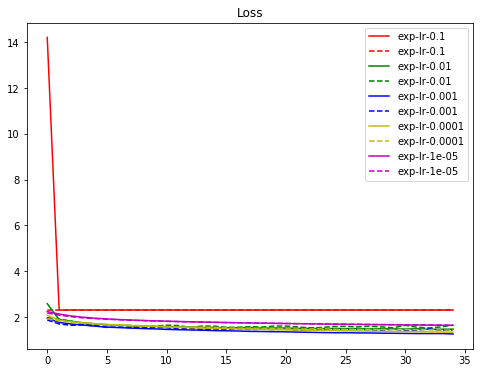

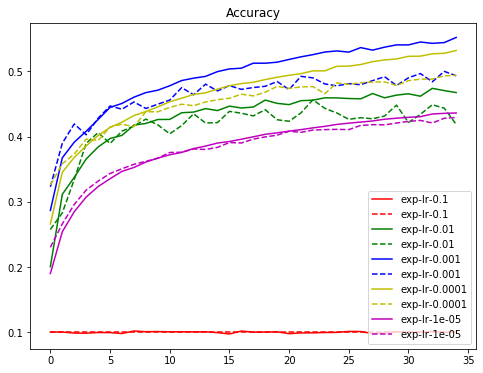

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

#將實驗結果繪出
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# RMSprop

In [9]:
results = {}

#建立你的訓練與實驗迴圈並蒐集資料
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" %(lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.RMSprop(learning_rate=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name = "exp-lr-%s" %str(lr)
    results[exp_name] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/35
50000/50000 [===============

50000/50000 [==============================] - 6s 121us/step - loss: 2.0461 - accuracy: 0.2219 - val_loss: 2.1330 - val_accuracy: 0.1976
Epoch 7/35
50000/50000 [==============================] - 6s 127us/step - loss: 1.9980 - accuracy: 0.2515 - val_loss: 2.1345 - val_accuracy: 0.2238
Epoch 8/35
50000/50000 [==============================] - 6s 121us/step - loss: 1.9751 - accuracy: 0.2590 - val_loss: 1.9142 - val_accuracy: 0.2807
Epoch 9/35
50000/50000 [==============================] - 6s 126us/step - loss: 1.9620 - accuracy: 0.2632 - val_loss: 1.9974 - val_accuracy: 0.2341
Epoch 10/35
50000/50000 [==============================] - 7s 131us/step - loss: 1.9499 - accuracy: 0.2691 - val_loss: 2.0295 - val_accuracy: 0.2437
Epoch 11/35
50000/50000 [==============================] - 7s 134us/step - loss: 1.9427 - accuracy: 0.2725 - val_loss: 2.0247 - val_accuracy: 0.2512
Epoch 12/35
50000/50000 [==============================] - 7s 137us/step - loss: 1.9464 - accuracy: 0.2761 - val_loss: 1.

50000/50000 [==============================] - 6s 125us/step - loss: 1.4667 - accuracy: 0.4798 - val_loss: 1.8042 - val_accuracy: 0.3652
Epoch 19/35
50000/50000 [==============================] - 6s 127us/step - loss: 1.4575 - accuracy: 0.4800 - val_loss: 1.6986 - val_accuracy: 0.4153
Epoch 20/35
50000/50000 [==============================] - 6s 121us/step - loss: 1.4520 - accuracy: 0.4822 - val_loss: 1.5880 - val_accuracy: 0.4375
Epoch 21/35
50000/50000 [==============================] - 6s 126us/step - loss: 1.4398 - accuracy: 0.4879 - val_loss: 1.5351 - val_accuracy: 0.4629
Epoch 22/35
50000/50000 [==============================] - 6s 123us/step - loss: 1.4310 - accuracy: 0.4927 - val_loss: 1.5730 - val_accuracy: 0.4419
Epoch 23/35
50000/50000 [==============================] - 6s 121us/step - loss: 1.4229 - accuracy: 0.4925 - val_loss: 1.6104 - val_accuracy: 0.4339
Epoch 24/35
50000/50000 [==============================] - 6s 128us/step - loss: 1.4128 - accuracy: 0.4957 - val_loss:

50000/50000 [==============================] - 6s 121us/step - loss: 1.3988 - accuracy: 0.5070 - val_loss: 1.6175 - val_accuracy: 0.4217
Epoch 31/35
50000/50000 [==============================] - 6s 124us/step - loss: 1.3929 - accuracy: 0.5100 - val_loss: 1.4760 - val_accuracy: 0.4754
Epoch 32/35
50000/50000 [==============================] - 6s 124us/step - loss: 1.3878 - accuracy: 0.5089 - val_loss: 1.4903 - val_accuracy: 0.4708
Epoch 33/35
50000/50000 [==============================] - 6s 121us/step - loss: 1.3800 - accuracy: 0.5128 - val_loss: 1.4701 - val_accuracy: 0.4739
Epoch 34/35
50000/50000 [==============================] - 6s 128us/step - loss: 1.3742 - accuracy: 0.5147 - val_loss: 1.5070 - val_accuracy: 0.4562
Epoch 35/35
50000/50000 [==============================] - 6s 121us/step - loss: 1.3693 - accuracy: 0.5187 - val_loss: 1.4732 - val_accuracy: 0.4779
Experiment with LR = 0.000010
Model: "model_1"
_________________________________________________________________
Layer

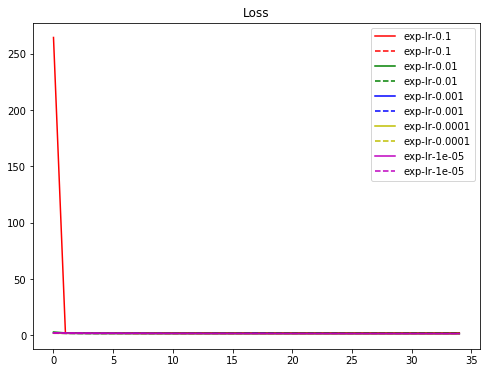

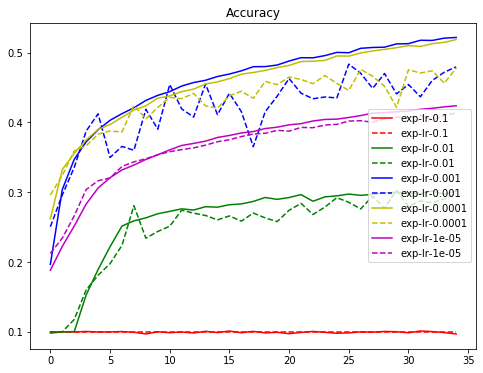

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

#將實驗結果繪出

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# SGD

In [11]:
results = {}

#建立你的訓練與實驗迴圈並蒐集資料
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" %(lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.SGD(learning_rate=lr, momentum=MOMENTUM, nesterov=True)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name = "exp-lr-%s" %str(lr)
    results[exp_name] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/35
50000/50000 [===============

50000/50000 [==============================] - 6s 120us/step - loss: 1.4299 - accuracy: 0.4884 - val_loss: 1.5424 - val_accuracy: 0.4576
Epoch 7/35
50000/50000 [==============================] - 6s 120us/step - loss: 1.4074 - accuracy: 0.5005 - val_loss: 1.4749 - val_accuracy: 0.4780
Epoch 8/35
50000/50000 [==============================] - 6s 125us/step - loss: 1.3774 - accuracy: 0.5093 - val_loss: 1.5129 - val_accuracy: 0.4636
Epoch 9/35
50000/50000 [==============================] - 6s 120us/step - loss: 1.3438 - accuracy: 0.5232 - val_loss: 1.4304 - val_accuracy: 0.4917
Epoch 10/35
50000/50000 [==============================] - 6s 122us/step - loss: 1.3210 - accuracy: 0.5285 - val_loss: 1.4631 - val_accuracy: 0.4940
Epoch 11/35
50000/50000 [==============================] - 6s 121us/step - loss: 1.2992 - accuracy: 0.5366 - val_loss: 1.4347 - val_accuracy: 0.4927
Epoch 12/35
50000/50000 [==============================] - 6s 119us/step - loss: 1.2808 - accuracy: 0.5439 - val_loss: 1.

Epoch 19/35
50000/50000 [==============================] - 6s 123us/step - loss: 1.3809 - accuracy: 0.5115 - val_loss: 1.4434 - val_accuracy: 0.4861
Epoch 20/35
50000/50000 [==============================] - 6s 120us/step - loss: 1.3666 - accuracy: 0.5175 - val_loss: 1.4517 - val_accuracy: 0.4850
Epoch 21/35
50000/50000 [==============================] - 6s 119us/step - loss: 1.3536 - accuracy: 0.5214 - val_loss: 1.4348 - val_accuracy: 0.4934
Epoch 22/35
50000/50000 [==============================] - 6s 129us/step - loss: 1.3454 - accuracy: 0.5244 - val_loss: 1.4157 - val_accuracy: 0.4979
Epoch 23/35
50000/50000 [==============================] - 6s 119us/step - loss: 1.3339 - accuracy: 0.5283 - val_loss: 1.4227 - val_accuracy: 0.4954
Epoch 24/35
50000/50000 [==============================] - 6s 121us/step - loss: 1.3194 - accuracy: 0.5337 - val_loss: 1.4123 - val_accuracy: 0.4996
Epoch 25/35
50000/50000 [==============================] - 6s 122us/step - loss: 1.3120 - accuracy: 0.5364

50000/50000 [==============================] - 6s 124us/step - loss: 1.7178 - accuracy: 0.3972 - val_loss: 1.7178 - val_accuracy: 0.3972
Epoch 32/35
50000/50000 [==============================] - 6s 118us/step - loss: 1.7121 - accuracy: 0.4001 - val_loss: 1.7140 - val_accuracy: 0.3972
Epoch 33/35
50000/50000 [==============================] - 6s 123us/step - loss: 1.7068 - accuracy: 0.3997 - val_loss: 1.7069 - val_accuracy: 0.4016
Epoch 34/35
50000/50000 [==============================] - 6s 120us/step - loss: 1.7016 - accuracy: 0.4021 - val_loss: 1.7023 - val_accuracy: 0.4041
Epoch 35/35
50000/50000 [==============================] - 6s 119us/step - loss: 1.6961 - accuracy: 0.4047 - val_loss: 1.6967 - val_accuracy: 0.4033
Experiment with LR = 0.000010
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
______________________

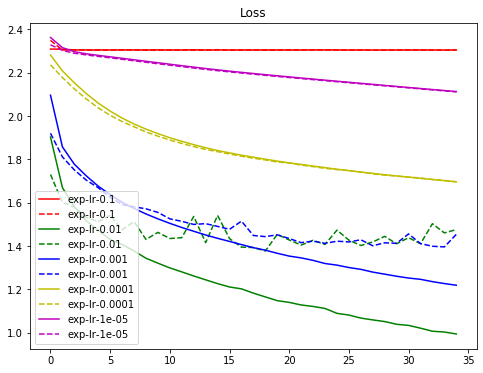

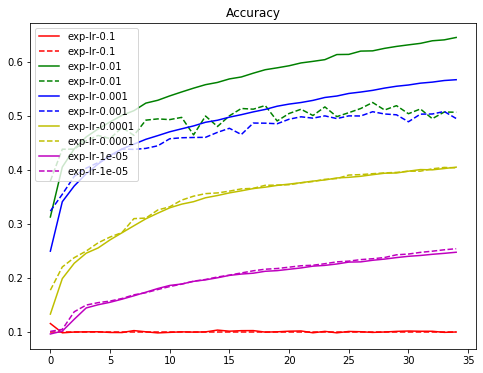

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

#將實驗結果繪出
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# AdaGrad

In [13]:
results = {}

#建立你的訓練與實驗迴圈並蒐集資料
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" %(lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.Adagrad(learning_rate=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name = "exp-lr-%s" %str(lr)
    results[exp_name] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/35
50000/50000 [===============

50000/50000 [==============================] - 6s 117us/step - loss: 1.8013 - accuracy: 0.3548 - val_loss: 1.8262 - val_accuracy: 0.3459
Epoch 7/35
50000/50000 [==============================] - 6s 120us/step - loss: 1.7812 - accuracy: 0.3630 - val_loss: 1.8021 - val_accuracy: 0.3498
Epoch 8/35
50000/50000 [==============================] - 6s 118us/step - loss: 1.7613 - accuracy: 0.3702 - val_loss: 1.7551 - val_accuracy: 0.3730
Epoch 9/35
50000/50000 [==============================] - 6s 117us/step - loss: 1.7401 - accuracy: 0.3788 - val_loss: 1.7903 - val_accuracy: 0.3560
Epoch 10/35
50000/50000 [==============================] - 6s 122us/step - loss: 1.7227 - accuracy: 0.3827 - val_loss: 1.7950 - val_accuracy: 0.3614
Epoch 11/35
50000/50000 [==============================] - 6s 117us/step - loss: 1.7072 - accuracy: 0.3886 - val_loss: 1.7696 - val_accuracy: 0.3610
Epoch 12/35
50000/50000 [==============================] - 6s 118us/step - loss: 1.6874 - accuracy: 0.3972 - val_loss: 1.

50000/50000 [==============================] - 6s 121us/step - loss: 1.6455 - accuracy: 0.4253 - val_loss: 1.6549 - val_accuracy: 0.4158
Epoch 19/35
50000/50000 [==============================] - 6s 122us/step - loss: 1.6395 - accuracy: 0.4271 - val_loss: 1.6456 - val_accuracy: 0.4202
Epoch 20/35
50000/50000 [==============================] - 6s 119us/step - loss: 1.6334 - accuracy: 0.4291 - val_loss: 1.6403 - val_accuracy: 0.4231
Epoch 21/35
50000/50000 [==============================] - 6s 117us/step - loss: 1.6275 - accuracy: 0.4313 - val_loss: 1.6371 - val_accuracy: 0.4270
Epoch 22/35
50000/50000 [==============================] - 6s 123us/step - loss: 1.6219 - accuracy: 0.4336 - val_loss: 1.6304 - val_accuracy: 0.4275
Epoch 23/35
50000/50000 [==============================] - 6s 130us/step - loss: 1.6167 - accuracy: 0.4354 - val_loss: 1.6333 - val_accuracy: 0.4275
Epoch 24/35
50000/50000 [==============================] - 6s 126us/step - loss: 1.6118 - accuracy: 0.4365 - val_loss:

Epoch 31/35
50000/50000 [==============================] - 6s 127us/step - loss: 1.8682 - accuracy: 0.3470 - val_loss: 1.8687 - val_accuracy: 0.3435
Epoch 32/35
50000/50000 [==============================] - 6s 119us/step - loss: 1.8654 - accuracy: 0.3484 - val_loss: 1.8660 - val_accuracy: 0.3429
Epoch 33/35
50000/50000 [==============================] - 6s 118us/step - loss: 1.8627 - accuracy: 0.3502 - val_loss: 1.8631 - val_accuracy: 0.3456
Epoch 34/35
50000/50000 [==============================] - 6s 123us/step - loss: 1.8600 - accuracy: 0.3507 - val_loss: 1.8608 - val_accuracy: 0.3461
Epoch 35/35
50000/50000 [==============================] - 6s 117us/step - loss: 1.8574 - accuracy: 0.3512 - val_loss: 1.8583 - val_accuracy: 0.3478
Experiment with LR = 0.000010
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
__________

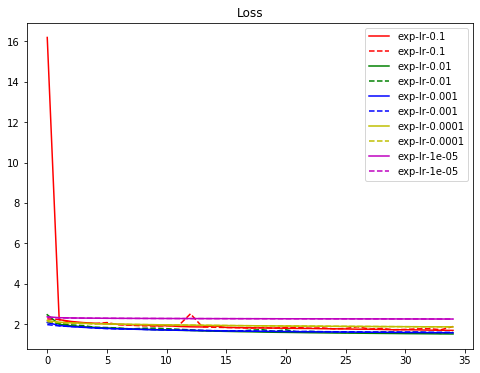

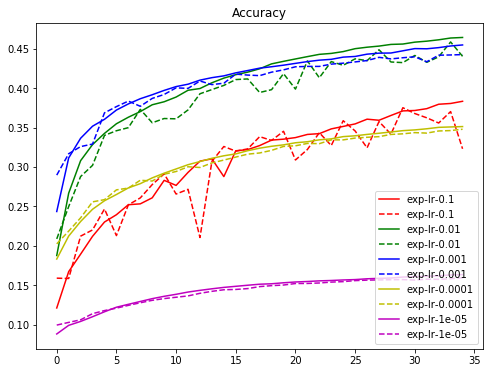

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

#將實驗結果繪出
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()